In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv(('data/Carseats.csv'))
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [51]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

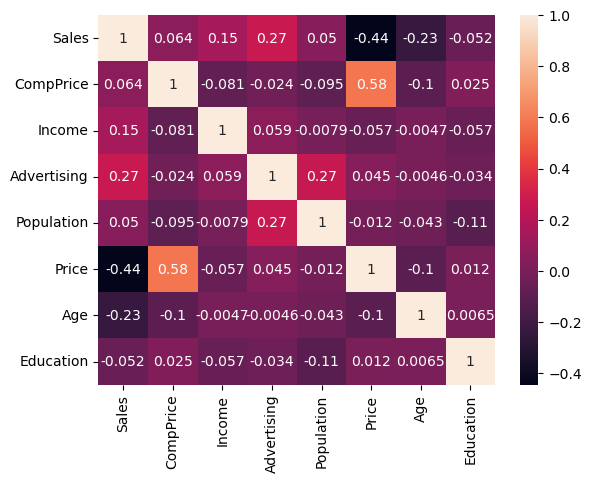

In [52]:
mtrx = df.corr(numeric_only=True)
sns.heatmap(mtrx, annot=True)
plt.show()

In [53]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [55]:
cols = ["ShelveLoc", "Urban", "US"]

for col in cols:
    print(f"{col}: {df[col].unique()}")

ShelveLoc: ['Bad' 'Good' 'Medium']
Urban: ['Yes' 'No']
US: ['Yes' 'No']


In [56]:
df['Urban'] = (df['Urban'] == "Yes").astype(int)
df["US"] = (df["US"]== "Yes").astype(int)

In [57]:
df = pd.get_dummies(df).astype(float)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,1.0,1.0,1.0,0.0,0.0
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,1.0,1.0,0.0,1.0,0.0
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,1.0,1.0,0.0,0.0,1.0
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,1.0,1.0,0.0,0.0,1.0
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,1.0,0.0,1.0,0.0,0.0


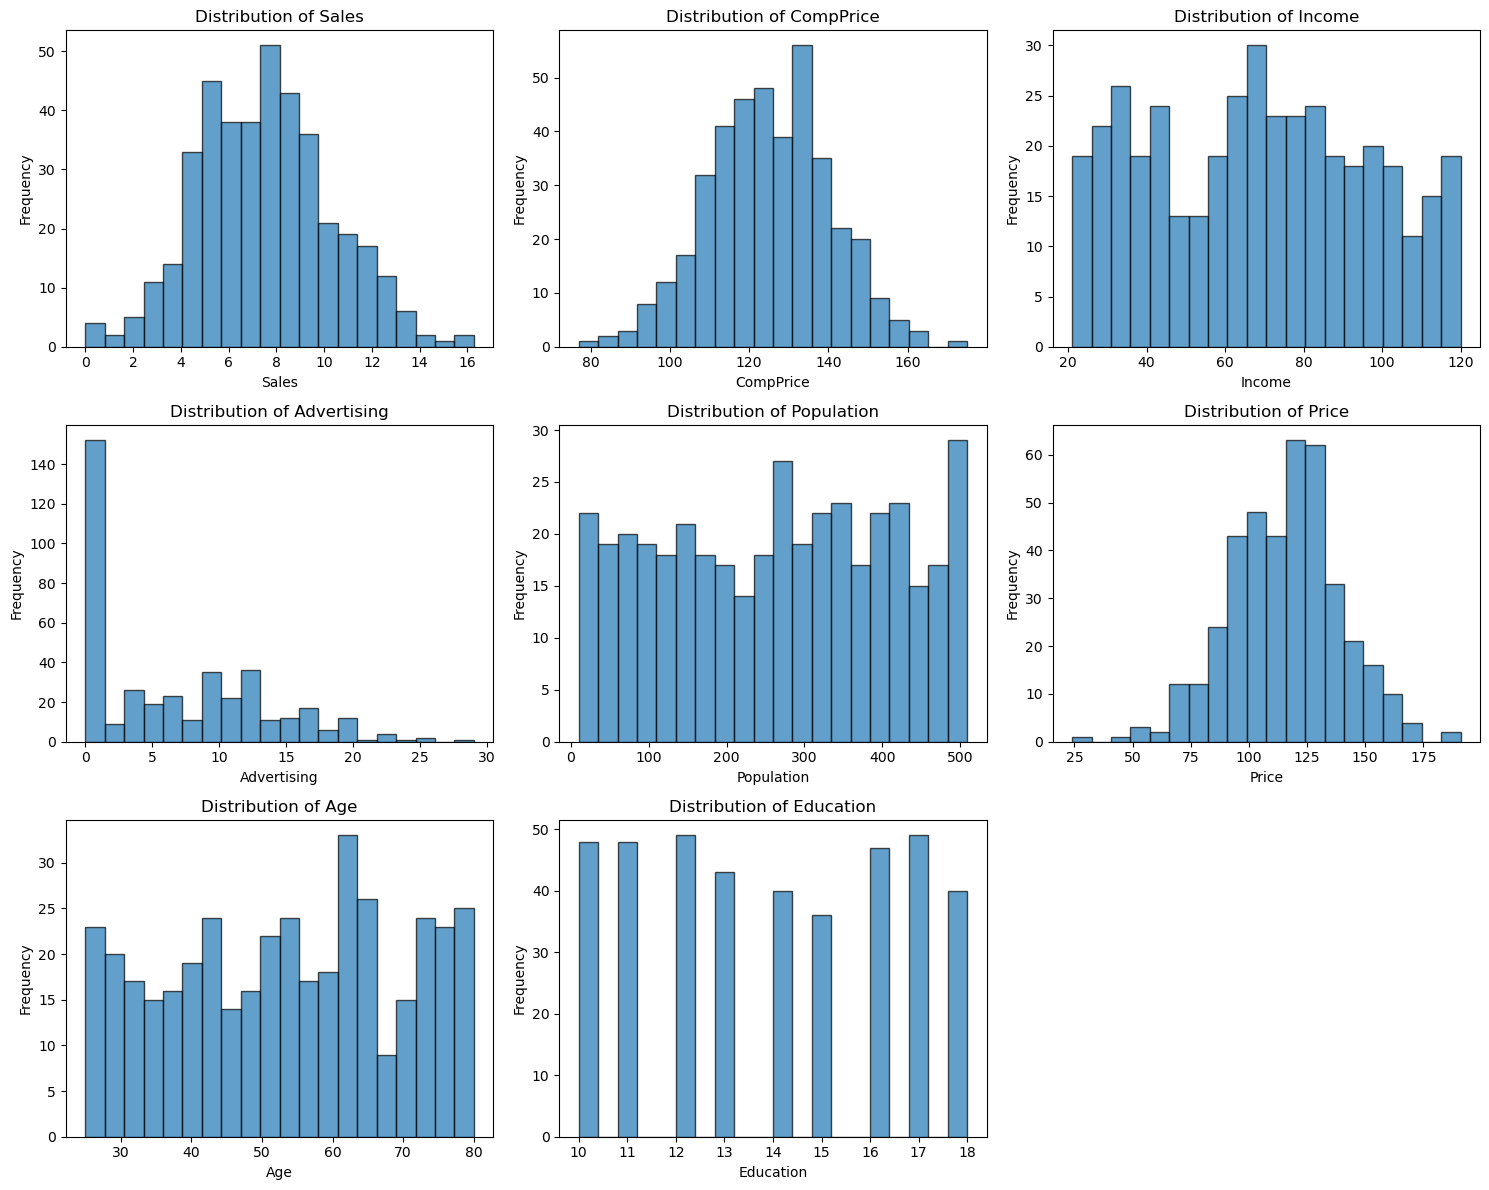

In [58]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

main_features = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

for i, feature in enumerate(main_features):
    axes[i].hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

axes[8].axis('off')

plt.tight_layout()
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    float64
 2   Income            400 non-null    float64
 3   Advertising       400 non-null    float64
 4   Population        400 non-null    float64
 5   Price             400 non-null    float64
 6   Age               400 non-null    float64
 7   Education         400 non-null    float64
 8   Urban             400 non-null    float64
 9   US                400 non-null    float64
 10  ShelveLoc_Bad     400 non-null    float64
 11  ShelveLoc_Good    400 non-null    float64
 12  ShelveLoc_Medium  400 non-null    float64
dtypes: float64(13)
memory usage: 40.8 KB


In [66]:
X = df.drop(["Sales"], axis=1)
y = df["Sales"]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [80]:
depths = [i for i in range(1, 16)]

tree_metrics = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    tree_metrics.append(r2_score(y_pred=y_pred, y_true=y_test))
    

In [81]:
estimators = [i for i in range(50, 1100, 50)]

forest_metrics = []

for estimator in estimators:
    model = RandomForestRegressor(n_estimators=estimator)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    forest_metrics.append(r2_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import r2_score


# Create comparison plot
plt.figure(figsize=(12, 6)) 
plt.plot(depths, tree_metrics, marker='o', label='Decision Tree', linewidth=2)
plt.plot(estimators, forest_metrics, marker='s', label='Random Forest', linewidth=2)
plt.xlabel('Max Depth / Number of Estimators')
plt.ylabel('R² Score')
plt.title('R² Score Comparison: Decision Tree vs Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()